WHAT IS RESNET50


ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully.

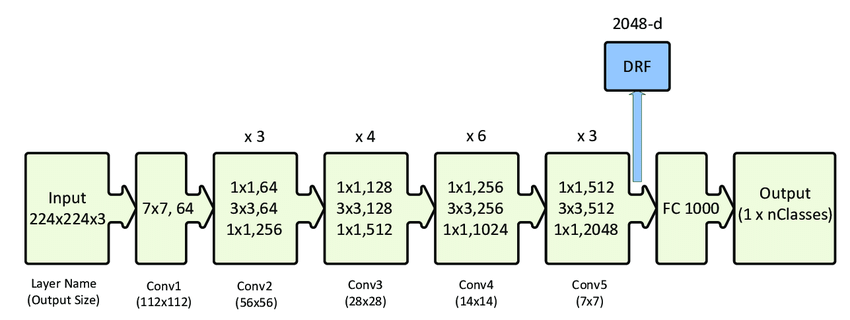

IMAGENET MODULE COMARISON

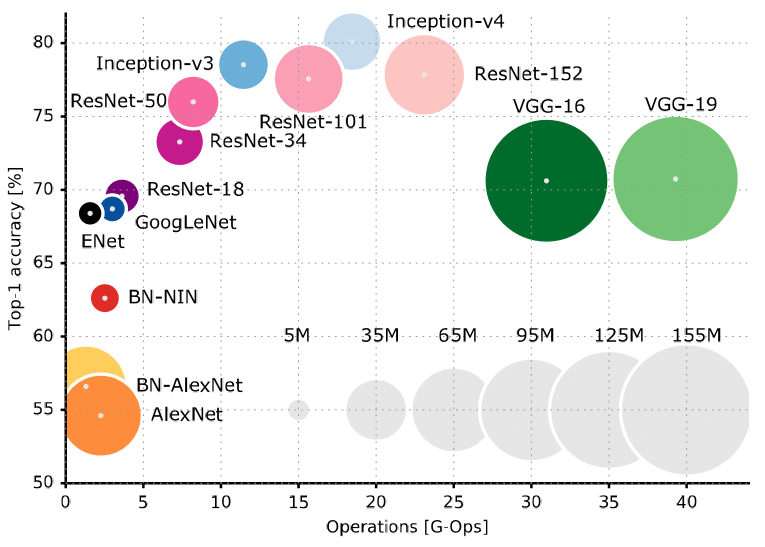

What is ktrain?

ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras. ... Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily: estimate an optimal learning rate for your model given your data using a learning rate finder.

LINK FOR LIBRARY AND MORE INFORMATION : https://github.com/amaiya/ktrain

DATASET LINK : https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction/tree/master/images

In [ ]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 32.71 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 100 kB/s 
     |████████████████████████████████| 6.8 MB 38.1 MB/s 
     |████████████████████████████████| 981 kB 49.7 MB/s 
     |████████████████████████████████| 263 kB 35.5 MB/s 
     |████████████████████████████████| 1.9 MB 32.8 MB/s 
     |████████████████████████████████| 1.2 MB 45.7 MB/s 
     |████████████████████████████████| 468 kB 48.3 MB/s 
     |████████████████████████████████| 3.3 MB 39.6 MB/s 
     |████████████████████████████████| 895 kB 39.7 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=41f334c7dd5bf3331f032884178866b9ff1abac5a301a6e652b5186f0f011da3
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=cd20231e6b999c8158d0a250cf71550802fbf8491b125d47539a7b640f3fd7ca
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

In [ ]:
%matplotlib inline 
import os
import ktrain
from ktrain import vision as vis

In [ ]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'
p = re.compile(pattern)
r= p.search('12_1_3_20170104221910239.jpg')
print(r.group(1))

12


In [ ]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/images'

In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression = True, random_state = 47)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-f

['label']
       label
13882   62.0
12097   54.0
6270     1.0
13179   25.0
14522   23.0
['label']
       label
1292     1.0
11391   80.0
8614    26.0
14715   27.0
5641    39.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [ ]:
model = vis.image_regression_model('pretrained_resnet50',train_data = train_data, val_data=test_data)


The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model = model,train_data=train_data,val_data=test_data,batch_size=64)

In [ ]:
#learning rate = 10e-4

In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 449s 1s/step - loss: 377.8272 - mae: 14.4588 - val_loss: 196.8901 - val_mae: 10.7045
Epoch 2/2
339/339 [==============================] - 409s 1s/step - loss: 174.6864 - mae: 10.1185 - val_loss: 170.8625 - val_mae: 10.0074


In [ ]:
learner.freeze(15)
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 536s 2s/step - loss: 26.0992 - mae: 3.8820 - val_loss: 71.1362 - val_mae: 6.0394
Epoch 2/2
339/339 [==============================] - 530s 2s/step - loss: 22.8019 - mae: 3.6206 - val_loss: 60.2079 - val_mae: 5.6869


In [ ]:
predictor = ktrain.get_predictor(learner.model,preproc)

In [ ]:
test_data.filenames[10:20]

['36_1_1_20170113000937962.jpg',
 '14_1_0_20170109213548658.jpg',
 '50_1_0_20170103163657008.jpg',
 '78_1_0_20170110181616162.jpg',
 '5_1_0_20170109193852084.jpg',
 '26_1_2_20170116184701683.jpg',
 '50_1_0_20170111182452949.jpg',
 '70_0_0_20170111201419254.jpg',
 '10_0_0_20170110220644705.jpg',
 '29_0_1_20170112214947864.jpg']

In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("predicted Age %s | Actual Age %s" % (pred, actual))

predicted Age 25 | Actual Age 26


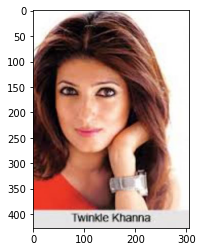

In [ ]:
show_prediction('26_1_3_20170119193113828.jpg')

predicted Age 17 | Actual Age 19


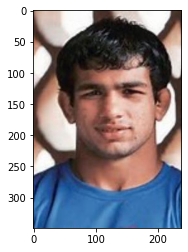

In [ ]:
show_prediction('19_0_3_20170104214230141.jpg')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


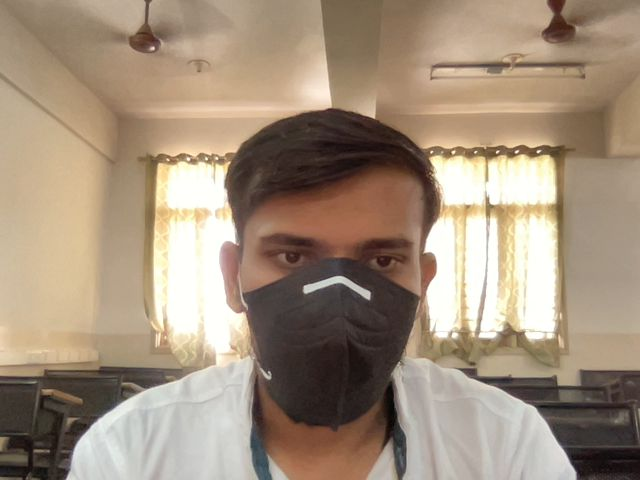

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print("predicted Age %s" % pred)

predicted Age 21


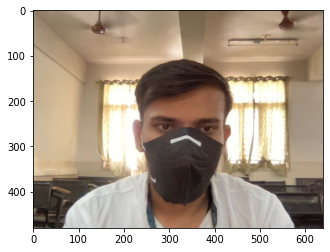

In [ ]:
real_prediction('photo.jpg')

In [ ]:
# predictor.save('/content/age_prediction)

In [ ]:
# !zip -r /content/age_prediction.zip /content/age_prediction